# Approach 
1. We will summarise the expenses family wise and category wise to see which family spends highest in a particular domain<br>
2. Then Find the correlations between all variables and visualising it through a heatmap<br>
3. Check Correlation of individual columns with "Savings" column <br>
4. Model the financial scoring of a family on basis of their average expenses in different doamins<br>
5. Normalise the scores in accordance with the number of members <br>
6. Finally, training a ML model to predict next months savings 

In [32]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
!pip install openpyxl

   ---------------------------------------- 0.0/250.9 kB ? eta -:--:--
   ---------------------------------------- 250.9/250.9 kB 5.1 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
data = pd.read_excel("C:\\Internships\\Sustain farmers\\family_financial_and_transactions_data (1).xlsx")

In [8]:
data

,Family ID,Member ID,Transaction Date,Category,Amount,Income,Savings,Monthly Expenses,Loan Payments,Credit Card Spending,Dependents,Financial Goals Met (%)
0,FAM001,FAM001_Member1,2024-10-07,Travel,409.12,113810,20234,5781,2422,2959,2,68
1,FAM001,FAM001_Member1,2024-10-16,Travel,270.91,113810,20234,5781,2422,2959,2,68
2,FAM001,FAM001_Member1,2024-10-17,Groceries,91.10,113810,20234,5781,2422,2959,2,68
3,FAM001,FAM001_Member1,2024-10-25,Healthcare,198.23,113810,20234,5781,2422,2959,2,68
4,FAM001,FAM001_Member1,2024-10-25,Education,206.42,113810,20234,5781,2422,2959,2,68
...,...,...,...,...,...,...,...,...,...,...,...,...
16301,FAM200,FAM200_Member6,2024-10-10,Groceries,79.99,44621,44081,4296,2470,2831,4,92
16302,FAM200,FAM200_Member6,2024-10-22,Education,228.39,44621,44081,4296,2470,2831,4,92
16303,FAM200,FAM200_Member6,2024-10-29,Travel,258.63,44621,44081,4296,2470,2831,4,92
16304,FAM200,FAM200_Member6,2024-10-26,Travel,467.46,44621,44081,4296,2470,2831,4,92


In [9]:
family_spending_summary = data.groupby(['Family ID', 'Category'])['Amount'].sum().reset_index()

# following is the family wise category wise spendings

In [10]:
family_spending_summary

,Family ID,Category,Amount
0,FAM001,Education,2251.01
1,FAM001,Entertainment,4168.86
2,FAM001,Food,4380.92
3,FAM001,Groceries,3410.61
4,FAM001,Healthcare,1575.89
...,...,...,...
1393,FAM200,Food,4154.26
1394,FAM200,Groceries,1624.38
1395,FAM200,Healthcare,2149.66
1396,FAM200,Travel,4744.98


# let's find out thw families that spend the most in a partcular domain (i.e which family spends most in edication, whcih family spends most in food etc.)

In [22]:
category_wise_most_spending_families = family_spending_summary.sort_values(['Category','Amount'], ascending = False)

category_wise_most_spending_families

,Family ID,Category,Amount
349,FAM050,Utilities,8641.33
202,FAM029,Utilities,8020.88
1355,FAM194,Utilities,7202.10
1390,FAM199,Utilities,7024.86
1306,FAM187,Utilities,7017.50
...,...,...,...
1209,FAM174,Education,404.78
105,FAM016,Education,339.87
420,FAM061,Education,295.38
574,FAM083,Education,283.57


# retrive those families that are spending the most in one category


In [30]:
k = category_wise_most_spending_families['Category'][0]
for i, j in zip(category_wise_most_spending_families['Family ID'], category_wise_most_spending_families['Category']) :
    if (j != k) : 
        print(j, ": ", i)
    k = j 


Utilities :  FAM050
Travel :  FAM194
Healthcare :  FAM196
Groceries :  FAM005
Food :  FAM071
Entertainment :  FAM050
Education :  FAM094


# Now we will see how the columns are related 
first we will find all the correlations betwwen the different columns 
then we will have a look at the graphs of two columns to know how they are changing with each other 


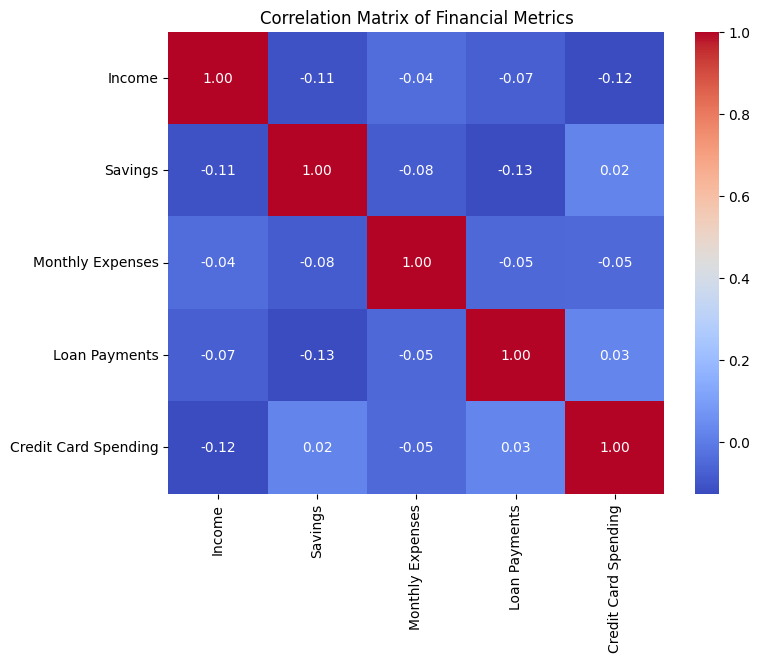

In [33]:
financial_metrics = data[['Income', 'Savings', 'Monthly Expenses', 'Loan Payments', 'Credit Card Spending']]
correlation_matrix = financial_metrics.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Financial Metrics")
plt.show()


# 
in the above figure we have obtained the corelations betwwn different columns <br> clearly the negative values means that there is a negative correlation between the metrices, i.e if one increases the other decreases 


# column wise analysis
we will here see the correlation of each column with "savings" column <br>
But before that we need find the avg values of all the finance related columns for every family 

In [51]:
avg_family_wise = data.groupby(['Family ID'])[['Income', 'Savings', 'Monthly Expenses', 'Loan Payments', 'Credit Card Spending']].mean().reset_index()


avg_family_wise

,Family ID,Income,Savings,Monthly Expenses,Loan Payments,Credit Card Spending
0,FAM001,113810.0,20234.0,5781.0,2422.0,2959.0
1,FAM002,44592.0,29492.0,5630.0,4541.0,995.0
2,FAM003,33278.0,11365.0,5282.0,1042.0,2818.0
3,FAM004,127196.0,30735.0,3591.0,1571.0,668.0
4,FAM005,66048.0,1212.0,3136.0,3444.0,1922.0
...,...,...,...,...,...,...
195,FAM196,64973.0,3604.0,3533.0,622.0,744.0
196,FAM197,130741.0,41591.0,6463.0,4850.0,1179.0
197,FAM198,114012.0,6372.0,4345.0,1989.0,1759.0
198,FAM199,74587.0,28474.0,3672.0,834.0,2937.0


# here is the scatter plot between different categories and Savings column (family wise)

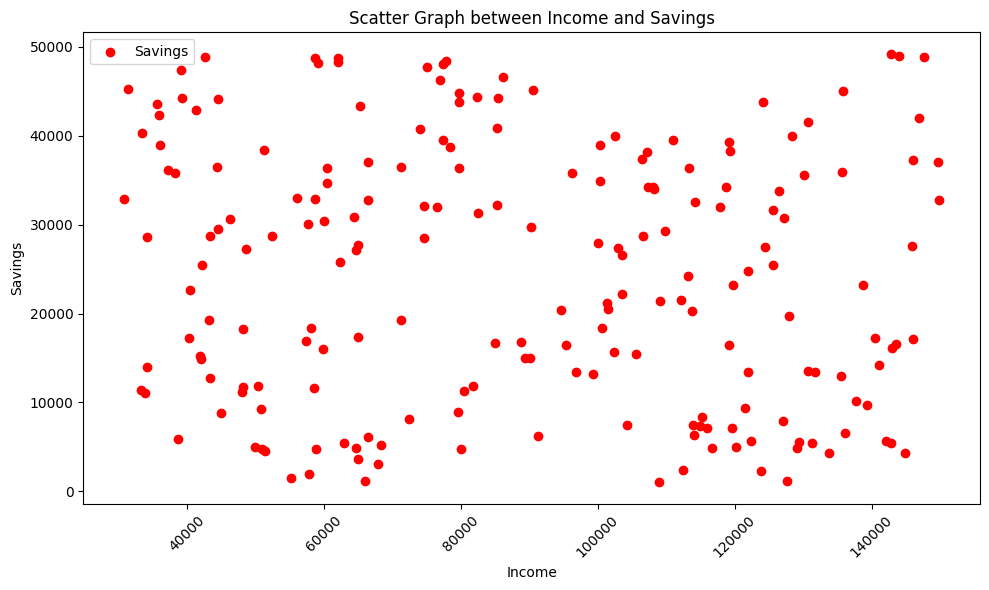

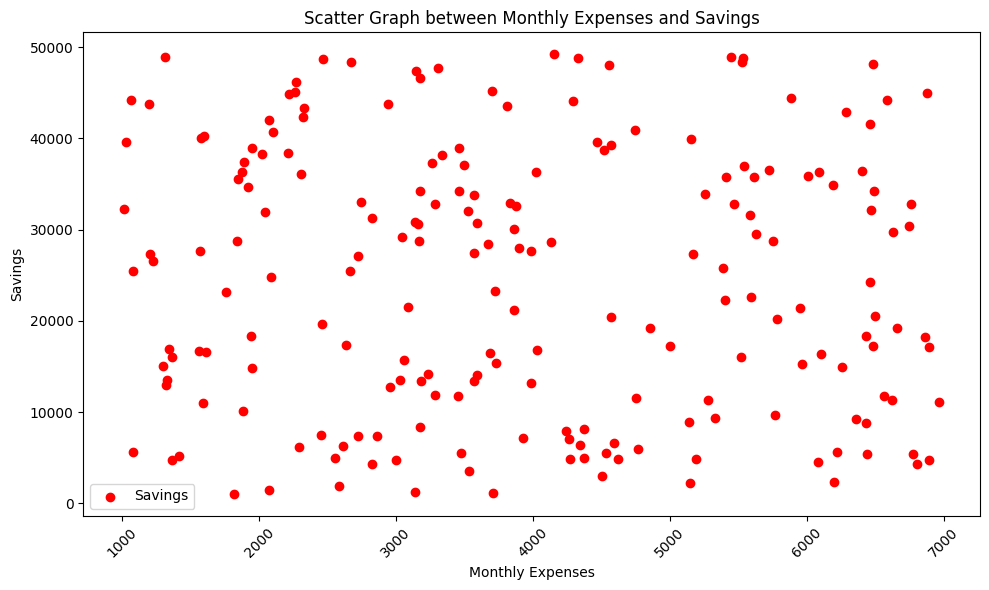

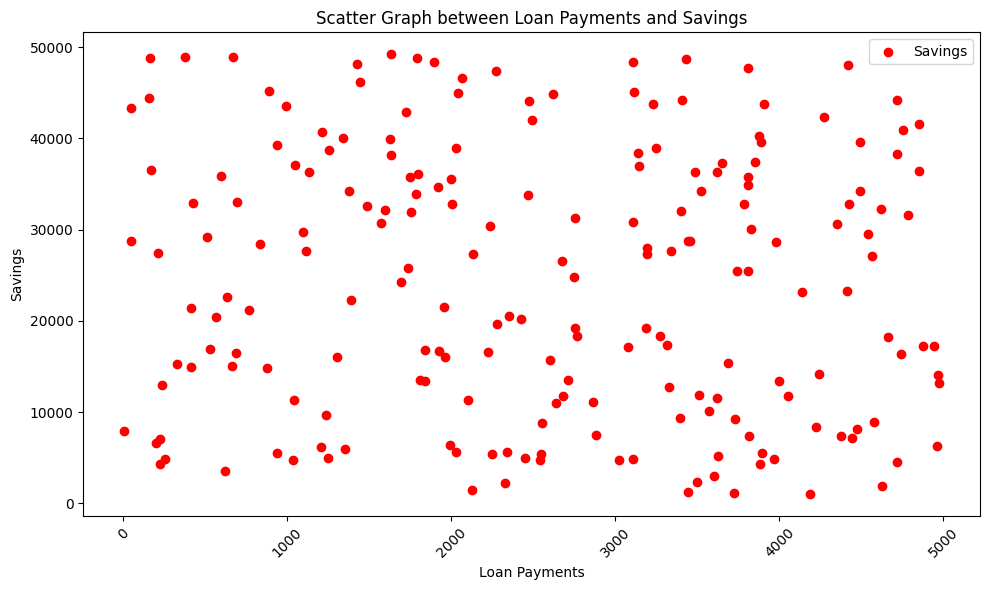

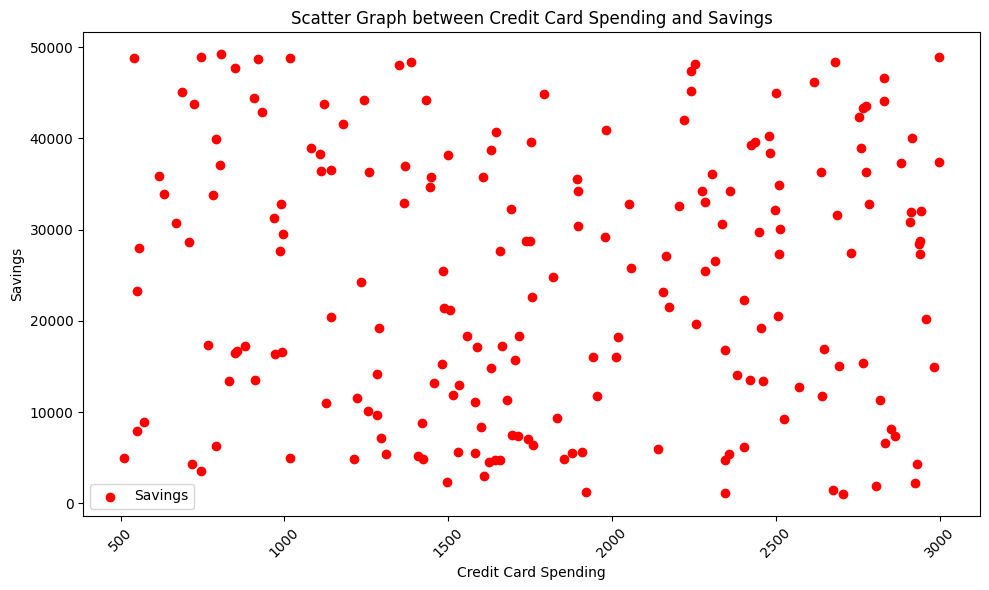

In [52]:
labels = ['Income', 'Monthly Expenses', 'Loan Payments', 'Credit Card Spending']

for i in labels : 
    plt.figure(figsize=(10, 6))
    plt.scatter(avg_family_wise[i], avg_family_wise['Savings'], color='r', label='Savings')

    plt.title(f'Scatter Graph between {i} and Savings')
    plt.xlabel(i)
    plt.ylabel('Savings')
    plt.xticks(rotation=45)  # Rotate date labels for better readability
    plt.legend()
    plt.tight_layout()
    plt.show()

Since in the correlation heatmap most correlations were very low (like 0.02, 0.03 or -0.05) there are no strict rule of savings going up or down with other expenses. The same is reflected in these scatter plots also, there is no strict going up or going down of "Savimgs" with any of the attriutes 

# Financial Scoring Model 

here we will give a score to each family depending upon the basis of their average expences, saving and financial goals meet
<br>
To calculate this we will give a weight to each attribute / column and the find their average score on a scale of 0 - 100.
The weights given are arbitrarily choosen by me on the basis of their importance in my personal opinion

In [54]:
def financial_score(row):
    savings_to_income = row['Savings'] / row['Income']
    expenses_to_income = row['Monthly Expenses'] / row['Income']
    loan_to_income = row['Loan Payments'] / row['Income']
    
    score = (savings_to_income * 40) + \
            ((1 - expenses_to_income) * 30) + \
            ((1 - loan_to_income) * 20) + \
            (row['Financial Goals Met (%)'] / 100 * 10)
    return min(max(score, 0), 100)

data['financial Score'] = data.apply(financial_score, axis = 1)

The column "financial score" will have a score in the range of 0 - 100 against each tuple of data <br>
We will find the familt wise avegrage by using groupby() method

In [70]:
family_scores = data.groupby('Family ID')[['financial Score', 'Dependents']].mean().reset_index()

In [71]:
family_scores

,Family ID,financial Score,Dependents
0,FAM001,61.962024,2.0
1,FAM002,76.630606,3.0
2,FAM003,68.272733,0.0
3,FAM004,66.771417,3.0
4,FAM005,57.166715,5.0
...,...,...,...
195,FAM196,52.996011,5.0
196,FAM197,66.699767,0.0
197,FAM198,55.843343,2.0
198,FAM199,67.169657,5.0


Now to get the actual and correct score we must normalise the data according to the number of dependents as they play a vital role is a familie's financial health  

# Normalisation with number of dependents 

In [72]:
family_scores['Dependents'] += 1 # since, we need to count the earning member too 

In [73]:
family_scores

,Family ID,financial Score,Dependents
0,FAM001,61.962024,3.0
1,FAM002,76.630606,4.0
2,FAM003,68.272733,1.0
3,FAM004,66.771417,4.0
4,FAM005,57.166715,6.0
...,...,...,...
195,FAM196,52.996011,6.0
196,FAM197,66.699767,1.0
197,FAM198,55.843343,3.0
198,FAM199,67.169657,6.0


In [74]:
family_scores['financial Score'] = 100 - ((100 - family_scores['financial Score'])/family_scores['Dependents'])

In [75]:
family_scores

,Family ID,financial Score,Dependents
0,FAM001,87.320675,3.0
1,FAM002,94.157652,4.0
2,FAM003,68.272733,1.0
3,FAM004,91.692854,4.0
4,FAM005,92.861119,6.0
...,...,...,...
195,FAM196,92.166002,6.0
196,FAM197,66.699767,1.0
197,FAM198,85.281114,3.0
198,FAM199,94.528276,6.0


# Idea behind using this formula
A family with less number of members should score higher than a family with high number of members.
<br>
So, I calculated how much a family is losing in a scale of 100. And then divide it by the number of members. Thsu we get the score lost per member. And again subtracting it from 100 shows scores gained per member. This calculation is better in my opinion as they previous one was not considering the number of depandants. 

# ML model to predict next months savings 
Here we will implement the Random Forest, XGBoost, Linear Regression and KNN algorithms and the prediction vs actual value graphs 

# Linear Regression

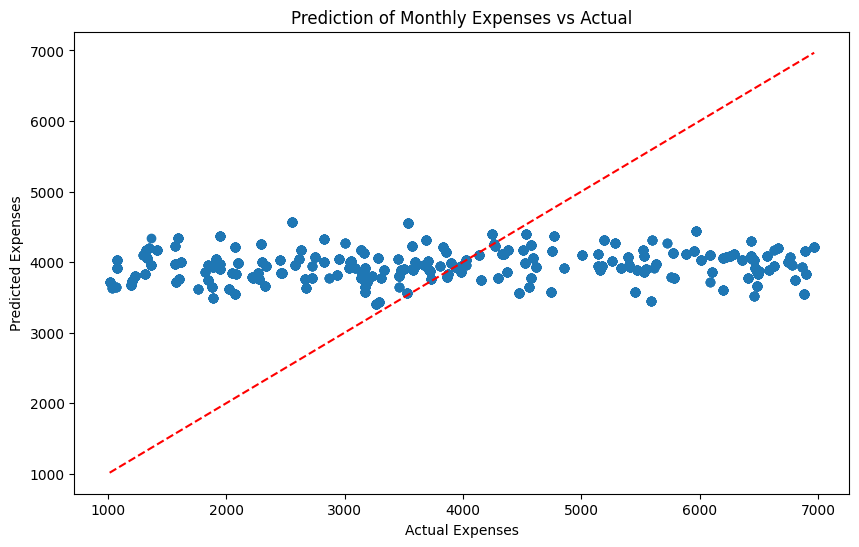

In [83]:
from sklearn.linear_model import LinearRegression
data['Month'] = pd.to_datetime(data['Transaction Date']).dt.month  


X = data[['Income', 'Savings', 'Loan Payments', 'Credit Card Spending']] 
y = data['Monthly Expenses'] 


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)


predictions = model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r', linestyle='--')
plt.title('Prediction of Monthly Expenses vs Actual')
plt.xlabel('Actual Expenses')
plt.ylabel('Predicted Expenses')
plt.show()


# KNN

Mean Absolute Error (MAE): 1386.47
Mean Squared Error (MSE): 2739876.91
R-squared (R²): 0.02


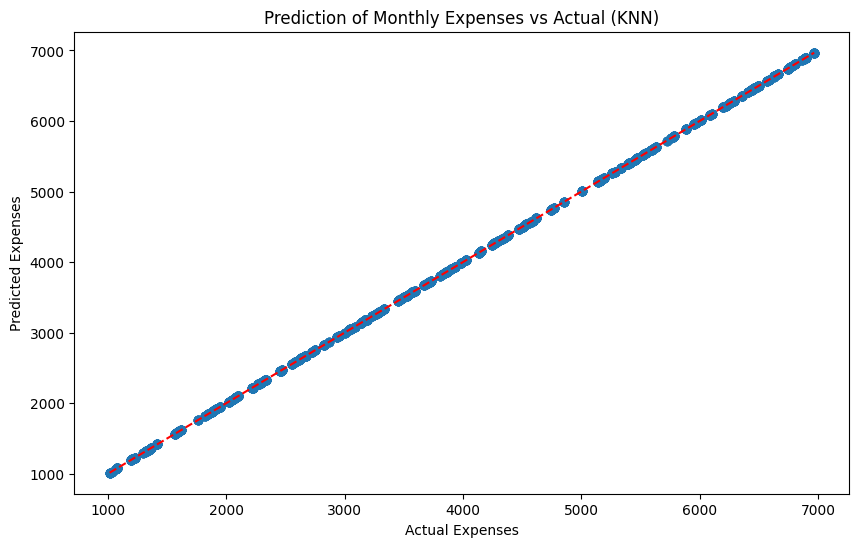

In [84]:
from sklearn.neighbors import KNeighborsRegressor
X = data[['Income', 'Savings', 'Loan Payments', 'Credit Card Spending']]  # Features
y = data['Monthly Expenses']  # Target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_model = KNeighborsRegressor(n_neighbors=3)
knn_model.fit(X_train, y_train)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, predictions) 
mse = mean_squared_error(y_test, predictions)  
r2 = r2_score(y_test, predictions) 

\
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

predictions = knn_model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r', linestyle='--')
plt.title('Prediction of Monthly Expenses vs Actual (KNN)')
plt.xlabel('Actual Expenses')
plt.ylabel('Predicted Expenses')
plt.show()

# Random Forest

Mean Absolute Error (MAE): 0.00
Mean Squared Error (MSE): 0.00
R-squared (R²): 1.00


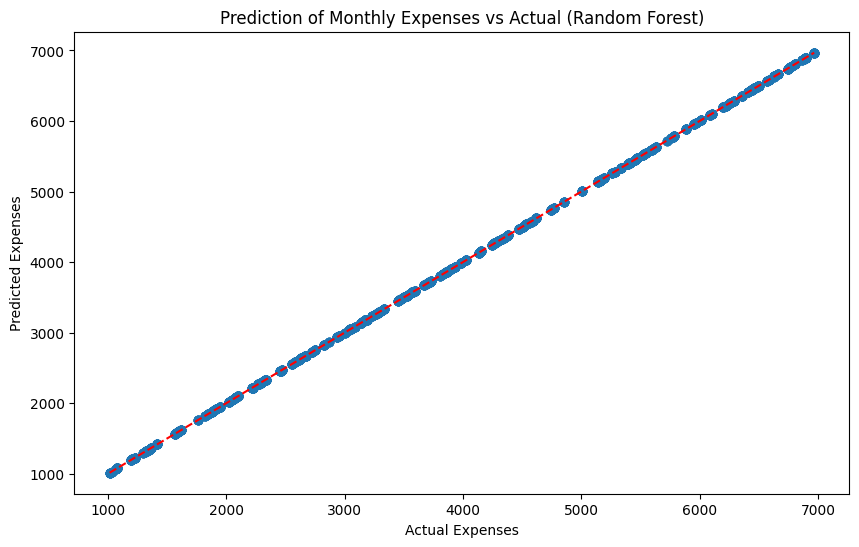

In [85]:
from sklearn.ensemble import RandomForestRegressor



X = data[['Income', 'Savings', 'Loan Payments', 'Credit Card Spending']]
y = data['Monthly Expenses']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

predictions = rf_model.predict(X_test)

mae = mean_absolute_error(y_test, predictions) 
mse = mean_squared_error(y_test, predictions)  
r2 = r2_score(y_test, predictions) 

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r', linestyle='--')
plt.title('Prediction of Monthly Expenses vs Actual (Random Forest)')
plt.xlabel('Actual Expenses')
plt.ylabel('Predicted Expenses')
plt.show()


# XGBoost

In [87]:
!pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.5/124.9 MB 11.1 MB/s eta 0:00:12
   ---------------------------------------- 1.2/124.9 MB 12.2 MB/s eta 0:00:11
    --------------------------------------- 2.1/124.9 MB 15.0 MB/s eta 0:00:09
    --------------------------------------- 3.0/124.9 MB 15.8 MB/s eta 0:00:08
   - -------------------------------------- 3.4/124.9 MB 15.5 MB/s eta 0:00:08
   - -------------------------------------- 4.4/124.9 MB 15.7 MB/s eta 0:00:08
   - -------------------------------------- 5.4/124.9 MB 16.4 MB/s eta 0:00:08
   -- ------------------------------------- 6.3/124.9 MB 17.6 MB/s eta 0:00:07
   -- ------------------------------------- 7.2/124.9 MB 17.1 MB/s eta 0:00:07
   -- ------------------------------------- 8.0/124.9 MB 17.6 MB/s eta 0:00:07
   -- ------------------------------------- 8.8/124.9 MB 17.7 MB/s eta 0:00:07
   --- ------------------------------------ 9.7/124.9 MB 17.


[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Mean Absolute Error (MAE): 0.51
Mean Squared Error (MSE): 0.65
R-squared (R²): 1.00


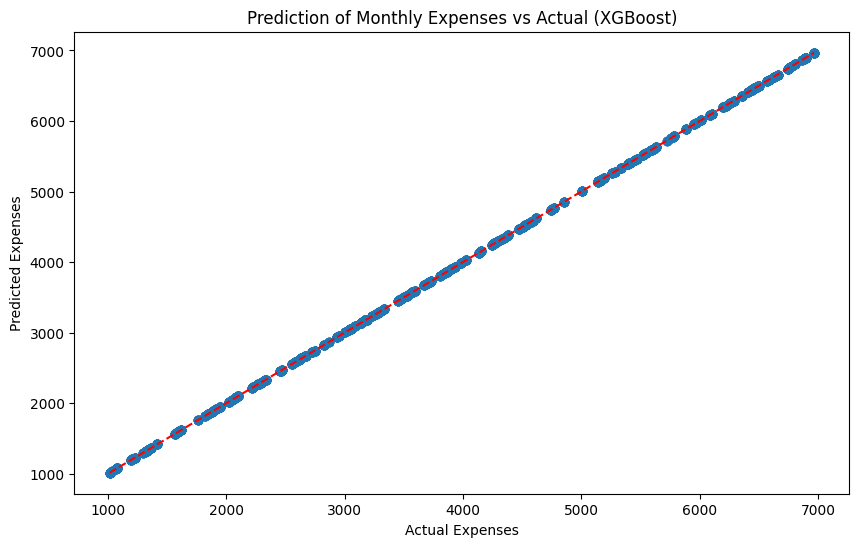

In [88]:
from xgboost import XGBRegressor

X = data[['Income', 'Savings', 'Loan Payments', 'Credit Card Spending']]
y = data['Monthly Expenses']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

predictions = xgb_model.predict(X_test)

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r', linestyle='--')
plt.title('Prediction of Monthly Expenses vs Actual (XGBoost)')
plt.xlabel('Actual Expenses')
plt.ylabel('Predicted Expenses')
plt.show()


# Inference 
So, for the given dataset, Linear Regression is not performing well. That means the data is not in a linearly correlated with "savings".